In [34]:
import json
import os
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#get dict with search term and video ID as key and value
def get_ID_search_term(json_dict):
    result = {}
    for key in json_dict:
        # key is each search term
        all_urls = json_dict[key]['urls']
        for url in all_urls:
            #get video ID
            vid_ID = int(url[len(url)-19:])
            result[vid_ID] = key
    return result

In [3]:
def add_vid_id(transcript_df):
    all_ids = []
    #transcript_df = pd.read_csv(filepath)
    for index, row in transcript_df.iterrows():
        transc_file_name = row['File Name']
        tfl = len(transc_file_name)
        transcript_id = int(transc_file_name[tfl-23:tfl-4])
        all_ids.append(transcript_id)
    transcript_df['video_id'] = all_ids
    return transcript_df

In [10]:

pyktok_chunk1 = pd.read_csv('pyktok_csv_files/urls2023_may2.csv')
pyktok_chunk2 = pd.read_csv('pyktok_csv_files/urls2023_may2.json_1-test_results.csv')
pyktok_chunks = pd.concat([pyktok_chunk1, pyktok_chunk2])


    #else: 
    #    print(f'length of pyktok files is not 2')
    #print(f'there should be two files, the filenames are {pyktok_files} and the number of files is: {len(pyktok_files)}')

json_paths = ['json_result_files/urls2023_may2.json']

search_term_dct = {}
for json_path in json_paths:
    with open(json_path, 'r') as jsonFile:
        data = json.load(jsonFile)
        search_term_dct.update(get_ID_search_term(data))
        
        

        
        
search_term_column = []
for index, row in pyktok_chunks.iterrows():
    try:
        id = row['video_id']
        search_term_column.append(search_term_dct[id])
    except  Exception as e:
        print(f'{e}')
        print(f'could not find video id from json dict for video {row["video_id"]}')
        search_term_column.append(None)
                        
pyktok_chunks['search_term'] = search_term_column
pyktok_chunks['year'] = 2023 * pyktok_chunks.shape[0]

   
pyktok_chunks.to_csv(f'final_result_2023_second.csv')
second = pd.read_csv('final_result_2023_second.csv')

7232326139858111790
could not find video id from json dict for video 7232326139858111790
7199113085502704939
could not find video id from json dict for video 7199113085502704939
7292480321919159598
could not find video id from json dict for video 7292480321919159598
7308516761496784171
could not find video id from json dict for video 7308516761496784171
7332685812108152110
could not find video id from json dict for video 7332685812108152110
7279116633581309227
could not find video id from json dict for video 7279116633581309227
7265084822991719723
could not find video id from json dict for video 7265084822991719723
7266077970522000682
could not find video id from json dict for video 7266077970522000682
7135866160519630122
could not find video id from json dict for video 7135866160519630122
7236141305984863530
could not find video id from json dict for video 7236141305984863530
7260471849480621358
could not find video id from json dict for video 7260471849480621358
7099576210782424366
c

In [92]:
pyktok_chunks = pd.read_csv('pyktok_csv_files/urls2023may1_result1.csv')



    #else: 
    #    print(f'length of pyktok files is not 2')
    #print(f'there should be two files, the filenames are {pyktok_files} and the number of files is: {len(pyktok_files)}')

json_paths = ['json_result_files/urls2023may1.json']

search_term_dct = {}
for json_path in json_paths:
    with open(json_path, 'r') as jsonFile:
        data = json.load(jsonFile)
        search_term_dct.update(get_ID_search_term(data))
        
        

        
        
search_term_column = []
for index, row in pyktok_chunks.iterrows():
    try:
        id = row['video_id']
        search_term_column.append(search_term_dct[id])
    except  Exception as e:
        print(f'{e}')
        print(f'could not find video id from json dict for video {row["video_id"]}')
        search_term_column.append(None)
                        
pyktok_chunks['search_term'] = search_term_column
pyktok_chunks['year'] = 2023 * pyktok_chunks.shape[0]

   
pyktok_chunks.to_csv(f'final_result_2023_first.csv')
first = pd.read_csv('final_result_2023_first.csv')

7290658319348370730
could not find video id from json dict for video 7290658319348370730
7343678428962557230
could not find video id from json dict for video 7343678428962557230
7294568265764883754
could not find video id from json dict for video 7294568265764883754
7290658319348370730
could not find video id from json dict for video 7290658319348370730
7343678428962557230
could not find video id from json dict for video 7343678428962557230
7294568265764883754
could not find video id from json dict for video 7294568265764883754
7363820743664241966
could not find video id from json dict for video 7363820743664241966
7316784183622356266
could not find video id from json dict for video 7316784183622356266
7306193234621910304
could not find video id from json dict for video 7306193234621910304
7313661157842128174
could not find video id from json dict for video 7313661157842128174
7313661157842128174
could not find video id from json dict for video 7313661157842128174
7313661157842128174
c

In [95]:
video_dict_1 = {}
video_dict_2 = {}

groups_1 = first.groupby('search_term')
for group_name, group_data in groups_1:
    video_set = set(group_data['video_id'])
    video_dict_1[group_name] = video_set

groups_2 = second.groupby('search_term')
for group_name, group_data in groups_2:
    video_set = set(group_data['video_id'])
    video_dict_2[group_name] = video_set

results = []
for term in video_dict_1:
    if term in video_dict_2:
        videos_1 = video_dict_1[term]
        videos_2 = video_dict_2[term]
        intersection = videos_1.intersection(videos_2)
        union = videos_1.union(videos_2)
        if union:
            overlap_percentage = len(intersection) / len(union) * 100
            results.append({'Search Term': term, 'Overlap Percentage': overlap_percentage})

final_results = pd.DataFrame(results)
final_results
print(len(final_results))
mean = final_results['Overlap Percentage'].mean()
mean

34


45.90950299663591

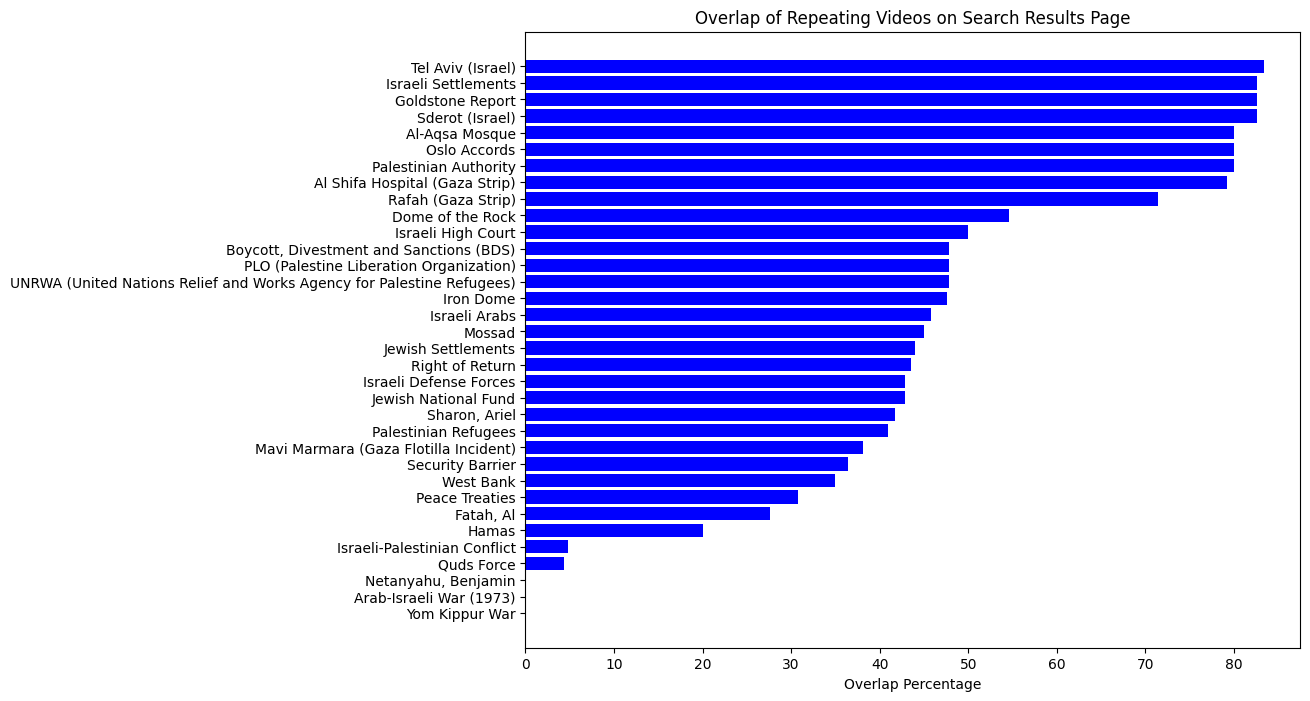

In [94]:
final_results = final_results.sort_values('Overlap Percentage', ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(final_results['Search Term'], final_results['Overlap Percentage'], color='blue')
plt.xlabel('Overlap Percentage')
plt.title('Overlap of Repeating Videos on Search Results Page')
plt.show()

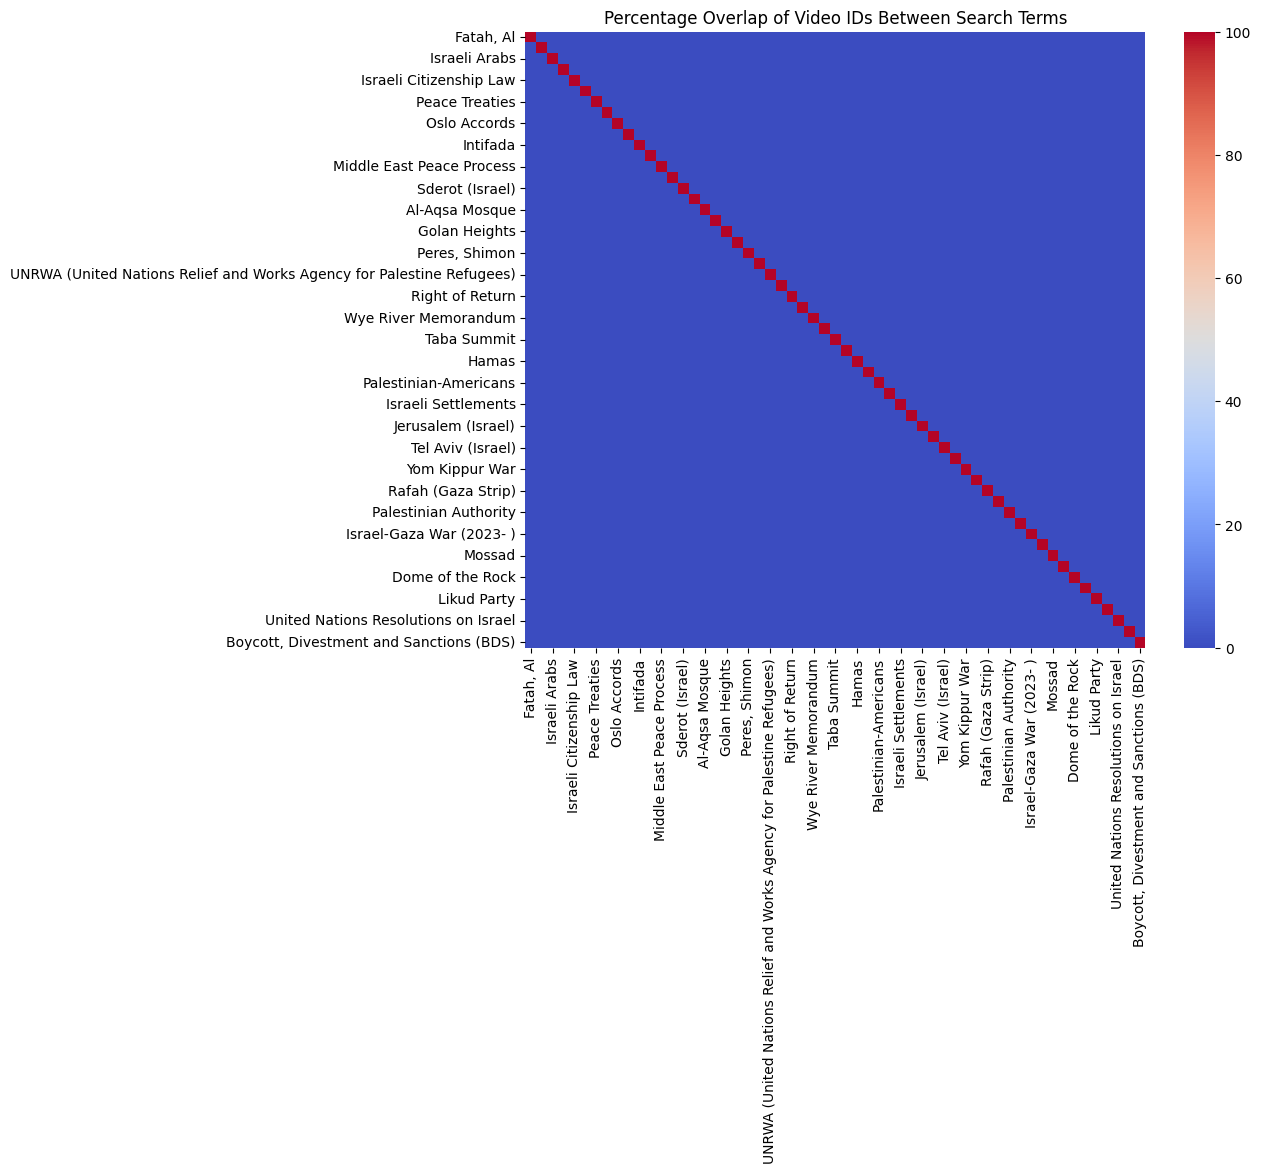

                                                    Fatah, Al  \
Fatah, Al                                               100.0   
Jewish National Fund                                      0.0   
Israeli Arabs                                             0.0   
Israeli Defense Forces                                    0.0   
Israeli Citizenship Law                                   0.0   
Security Barrier                                          0.0   
Peace Treaties                                            0.0   
Arab League                                               0.0   
Oslo Accords                                              0.0   
PLO (Palestine Liberation Organization)                   0.0   
Intifada                                                  0.0   
Camp David Accords                                        0.0   
Middle East Peace Process                                 0.0   
Separation Wall                                           0.0   
Sderot (Israel)          

In [87]:

df = pd.read_csv('final_result_2023.csv')

# Creating a dictionary with search terms as keys and sets of video IDs as values
video_dict = {}
for index, row in df.iterrows():
    term = row['search_term']
    video_id = row['video_id']
    if term in video_dict:
        video_dict[term].add(video_id)
    else:
        video_dict[term] = {video_id}

terms = list(video_dict.keys())
overlap_matrix = pd.DataFrame(index=terms, columns=terms, data=0.0)

for term1 in terms:
    for term2 in terms:
        if term1 != term2:
            videos1 = video_dict[term1]
            videos2 = video_dict[term2]
            intersection_count = sum(1 for v in videos1 if v in videos2)
            union = videos1.union(videos2)
            union_count = len(union)
            overlap = (intersection_count / union_count) * 100 if union_count > 0 else 0
            overlap_matrix.loc[term1, term2] = overlap
        else:
            overlap_matrix.loc[term1, term2] = 100  

plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix, cmap='coolwarm')
plt.title('Percentage Overlap of Video IDs Between Search Terms')
plt.show()

print(overlap_matrix)

In [88]:
df = pd.read_csv('final_result_2023.csv')
tel_aviv = df[df['search_term'] == 'Israeli Citizenship Law']
sderot = df[df['search_term'] == 'Israeli Settlements']

video_ids_1 = set(tel_aviv['video_id'])
video_ids_2 = set(sderot['video_id'])

# Calculate intersection and union
intersection = video_ids_1.intersection(video_ids_2)
union = video_ids_1.union(video_ids_2)

# Calculate the percentage of overlap
overlap_percentage = len(intersection) / len(union) * 100 if len(union) > 0 else 0

print(overlap_percentage)

0.0


In [20]:
len(search_terms_1)

31

In [91]:
final_results

,Search Term,Overlap Percentage
0,Al Shifa Hospital (Gaza Strip),91.666667
1,Al-Aqsa Mosque,92.000000
2,Arab-Israeli War (1973),0.000000
3,"Boycott, Divestment and Sanctions (BDS)",91.666667
4,Dome of the Rock,54.545455
5,"Fatah, Al",37.931034
6,Goldstone Report,91.304348
7,Hamas,23.529412
8,Iron Dome,57.142857
9,Israeli Arabs,50.000000
